In [20]:
import numpy as np
import matplotlib.pyplot as plt
from src.simulate import projectile
from sklearn.metrics import mean_squared_error

In [18]:
# generate the noisy data  and compute ground truth
t, y_noisy, meta = projectile(v0=20, theta_deg=45, g = 9.81, noise=0.05, num_points=200, seed=123)

In [10]:
theta_rad = np.deg2rad(45.0)
y_true = 20.0 * np.sin(theta_rad) * t - 0.5 * 9.81 * t**2

In [13]:
# The optimal parameters from GPT
fitted_params = {
     'B': 0.12201306873021624,
     'h0': 0.03493543408704826,
     'A': 66.3236230702704,
     'g': 9.646555866576442,
     'v0': 5.961176231508596
}

In [16]:
def gpt_formula(t,B,h0,A,g,v0):
    ''' this is the formular derived from GPT'''
    return h0 + v0 * t - (1/2) * g * t**2 + A * np.sin(B * t)


In [17]:
y_fit = gpt_formula(t,
                   fitted_params["B"],
                   fitted_params["h0"],
                   fitted_params["A"],
                   fitted_params["g"],
                   fitted_params["v0"]
                   )

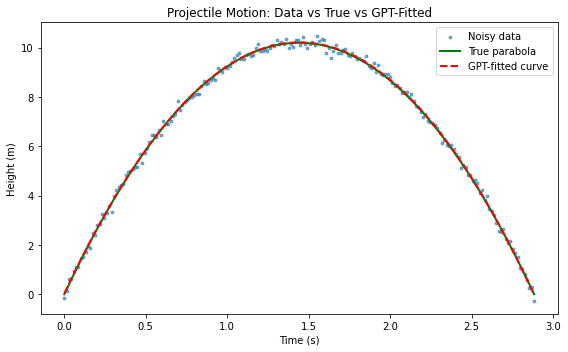

In [24]:
# plot comparison
plt.figure(figsize = (8,5))
plt.scatter(t,y_noisy, s=8, alpha = 0.6, label = "Noisy data")
plt.plot(t, y_true,  color="green", linewidth=2, label="True parabola")
plt.plot(t, y_fit, color="red", linestyle="--", linewidth=2, label="GPT-fitted curve")

plt.xlabel("Time (s)")
plt.ylabel("Height (m)")
plt.title("Projectile Motion: Data vs True vs GPT-Fitted")
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
# Compute metrics
mse_true = mean_squared_error(y_noisy, y_true)
mse_gpt = mean_squared_error(y_noisy, y_fit)

print(f"MSE (noisy vs true) is: {mse_true}")
print(f"MSE (noisy vs GPT fit) is: {mse_gpt}")

MSE (noisy vs true) is: 0.019503252920630335
MSE (noisy vs GPT fit) is: 0.019217288374763556


To evaluate GPT’s symbolic formula, I compared it against both the ground-truth physics model and the noisy simulated data.

- **Visualization:**  
  The plot shows:
  - Blue scatter points: noisy simulated data.  
  - Green line: the exact physics parabola ($y = v_0 \sin \theta \, t - \tfrac{1}{2} g t^2$).  
  - Red dashed line: GPT’s fitted formula after parameter optimization.  

- **Error Metrics:**  
  I used **Mean Squared Error (MSE)** to measure how close each curve is to the noisy data:
  - MSE (noisy vs. true parabola): ~0.0195  
  - MSE (noisy vs. GPT-fitted curve): ~0.0192  

### Key Takeaway
GPT’s formula, once fitted to data, achieves almost identical performance to the ground-truth equation.  
This demonstrates that **LLMs can rediscover physical laws** from noisy data within a small error margin.
